In [19]:
import scipy.io
from IPython.display import clear_output
from scipy.spatial import distance_matrix
import numpy as np
from PIL import Image as Image
import matplotlib.pyplot as plt
import random as rand
%matplotlib inline

In [20]:
data = scipy.io.loadmat("mnistSmall.mat")

In [21]:
trainData = data['trainData']
print(trainData.shape)
N = trainData.shape[0]

(10000, 784)


# Picking centers

In [22]:
randomIndexes= np.random.choice(N,size=10,replace=False)
# randomIndexes = list(range(10))
centers = trainData[randomIndexes, :]

# Assigning to and calculating new centers

In [23]:
i = 0
costFunc = []
prevLabels=np.zeros(N)
while True:
    clear_output(wait=True)
    print(f"cycle: {i}")
    i += 1
    dist = distance_matrix(trainData,centers)
    labels = np.argmin(dist,axis=1)
    cost = np.sum(np.min(dist,axis=1))
    costFunc.append(cost)
    
    if np.array_equal(labels,prevLabels):
        break
    
    prevLabels = labels

    for index in range(10):
        centers[index] = np.sum(trainData,where=(labels==index).reshape((N,1)),axis=0)/np.sum(labels==index)
    

cycle: 67


Num of mistakes = 2196
Number of samples = 10000
Accuracy = 78.03999999999999


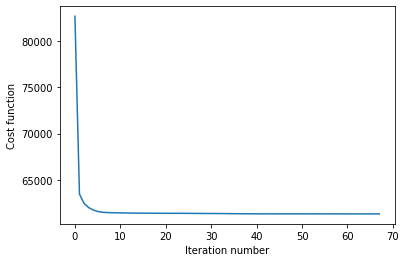

In [24]:
mistakes = np.sum(labels==np.argmin(data['trainLabels'],axis=1))
print(f"Num of mistakes = {mistakes}\nNumber of samples = {N}\nAccuracy = {(1-mistakes/N)*100}")

fig = plt.figure()
fig.set_facecolor("white")
plt.plot(costFunc)
plt.xlabel('Iteration number')
plt.ylabel('Cost function')

plt.show()

# Test

In [25]:
testData = data['testData']
dist = distance_matrix(testData,centers)
testLabels = np.argmin(dist,axis=1)

In [26]:
mistakes = np.sum(testLabels==np.argmin(data['testLabels'],axis=1))
print(f"Num of mistakes = {mistakes}\nNumber of samples = {N}\nAccuracy = {(1-mistakes/N)*100}")

Num of mistakes = 417
Number of samples = 10000
Accuracy = 95.83
